In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Lecture 16 - Cluster Analysis

In [2]:
plt.jet() # set the color map. When your colors are lost, re-run this.
import sklearn.datasets as datasets
X, Y = datasets.make_blobs(centers=5, cluster_std=0.75, random_state=11)
# X, Y = datasets.make_blobs(centers=5, cluster_std=2.4, random_state=11)

First, let's explore our data.

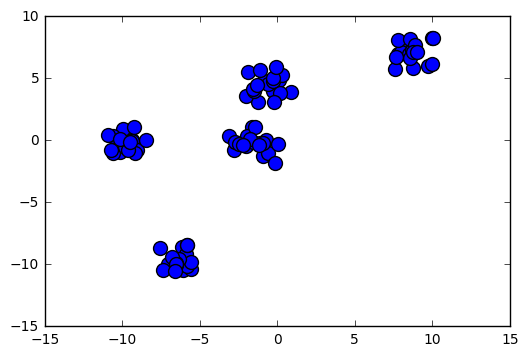

In [3]:
plt.scatter(X[:,0], X[:,1],s=100);

The data looks like it may contain three different "types" of data point. 

In fact, this is how it was created above.

We can plot this information as well, using color:

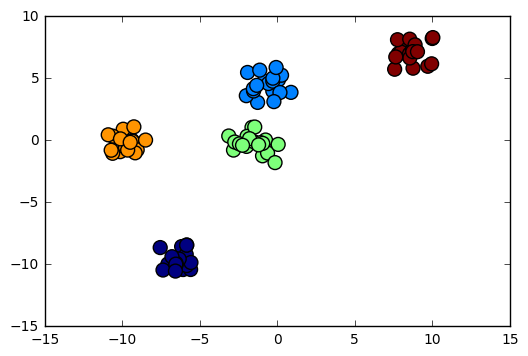

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100);

Now the label assignments should be quite similar to `Y`, up to a different ordering of the colors:

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(8, random_state=8)
Y_hat = kmeans.fit(X).labels_

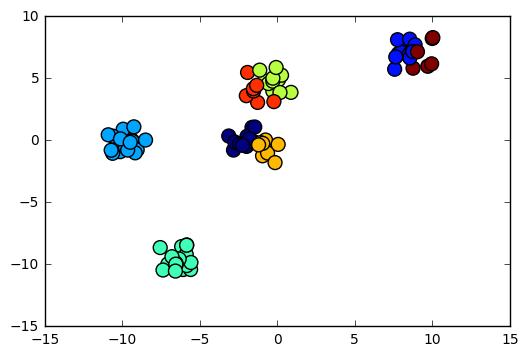

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y_hat, s=100);

Often, you're not so much interested in the assignments to the means. 

You'll want to have a closer look at the means $\mu$.

The means in $\mu$ can be seen as *representatives* of their respective cluster.

[[-2.15945343  0.07529163]
 [ 8.28105198  7.20681131]
 [-9.80220499 -0.21095017]
 [-6.34960932 -9.65188331]
 [-0.22075885  4.77271907]
 [-0.73840305 -0.59598927]
 [-1.40233297  3.98499261]
 [ 9.58236935  6.94363462]]


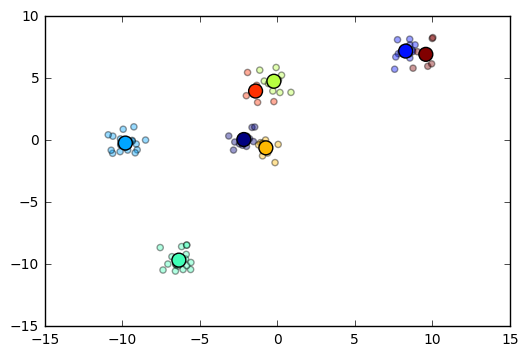

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y_hat, alpha=0.4)
mu = kmeans.cluster_centers_
plt.scatter(mu[:,0], mu[:,1], s=100, c=np.unique(Y_hat))
print mu

## $k$-Means on Images

In this final example, we use the $k$-Means algorithm on the classical MNIST dataset.

The MNIST dataset contains images of hand-written digits. 

Let's first fetch the dataset from the internet (which may take a while, note the asterisk [*]):

In [8]:
from sklearn.datasets import fetch_mldata
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
X_digits, _,_, Y_digits = fetch_mldata("MNIST Original").values() # fetch dataset from internet
X_digits, Y_digits = shuffle(X_digits,Y_digits) # shuffle dataset (which is ordered!)
X_digits = X_digits[-5000:]       # take only the last instances, to shorten runtime of KMeans

Let's have a look at some of the instances in the dataset we just loaded:

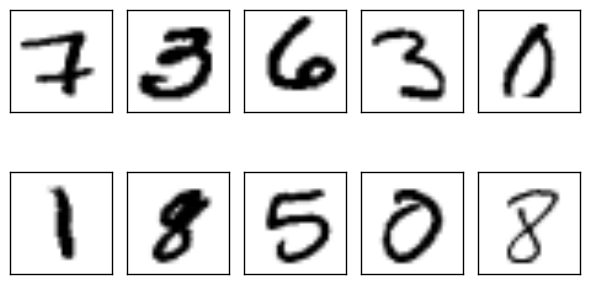

In [9]:
plt.rc("image", cmap="binary") # use black/white palette for plotting
for i in xrange(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

In [10]:
kmeans = KMeans(20)
mu_digits = kmeans.fit(X_digits).cluster_centers_

Let's have a closer look at the means. Even though there are 10 digits, some of them are over/under-represented. Do you understand why?

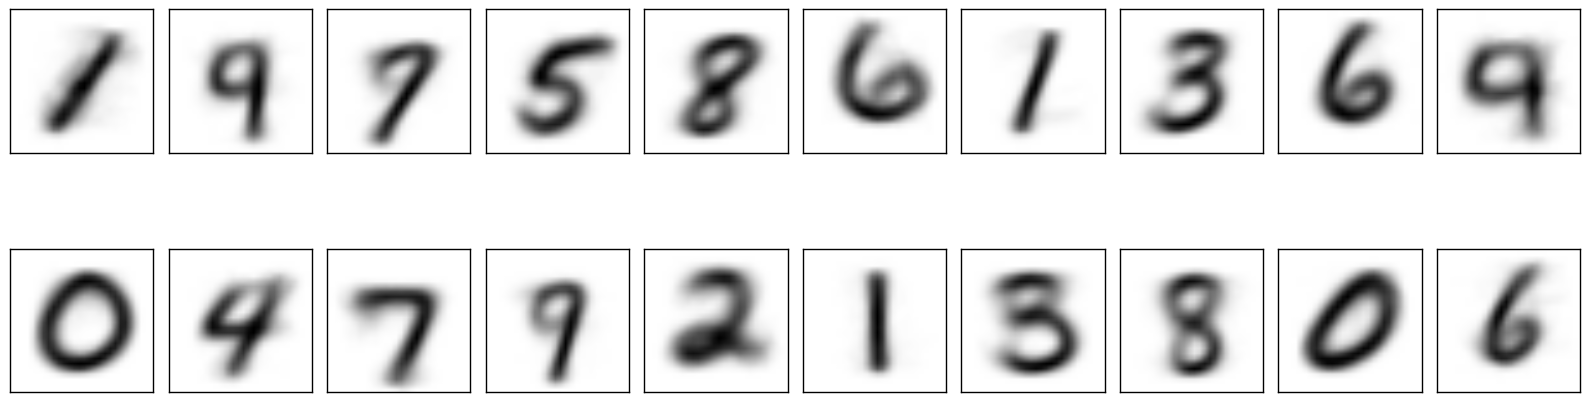

In [11]:
plt.figure(figsize=(16,6))
for i in xrange(2*(mu_digits.shape[0]/2)): # loop over all means
    plt.subplot(2,mu_digits.shape[0]/2,i+1)
    plt.imshow(mu_digits[i].reshape(28,28))
    plt.xticks(())
    plt.yticks(())
plt.tight_layout()

## Hierarchical Agglomerative Clustering (HAC)

Let's generate an articifial dataset

In [12]:
plt.jet() # set the color map. When your colors are lost, re-run this.
import sklearn.datasets as datasets
X, Y = datasets.make_blobs(n_samples=50, centers=4, 
                           cluster_std=2.0, random_state=10)

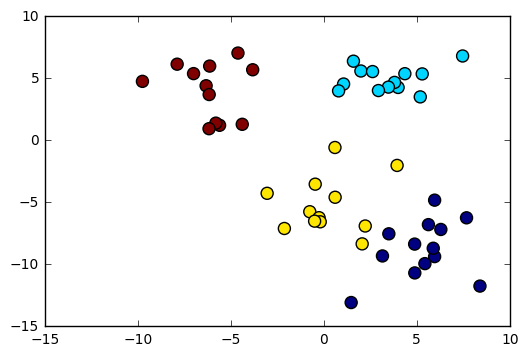

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y, s=75);

### Single Link

In [14]:
from scipy.cluster.hierarchy import linkage
Z = linkage(X, method='single', metric='euclidean')

Plot out the dendrogram

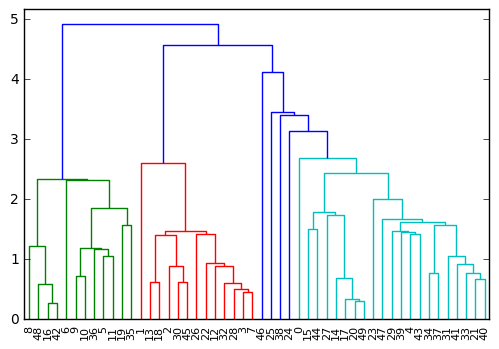

In [15]:
from scipy.cluster.hierarchy import dendrogram
d = dendrogram(Z, color_threshold=3)

Let's form flat clusters

In [16]:
from scipy.cluster.hierarchy import fcluster
Y_hat = fcluster(Z, t=4, criterion='distance')

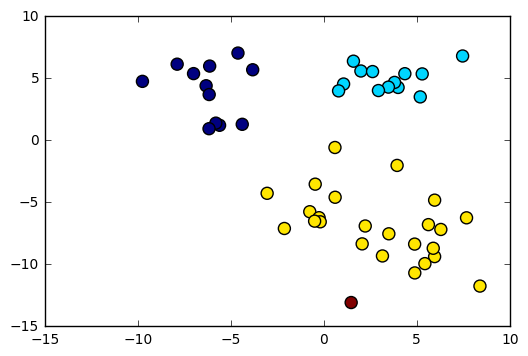

In [17]:
plt.scatter(X[:,0], X[:,1], c=Y_hat, s=75);

In [18]:
from scipy.cluster.hierarchy import fcluster
Y_hat = fcluster(Z, t=4, criterion='maxclust')

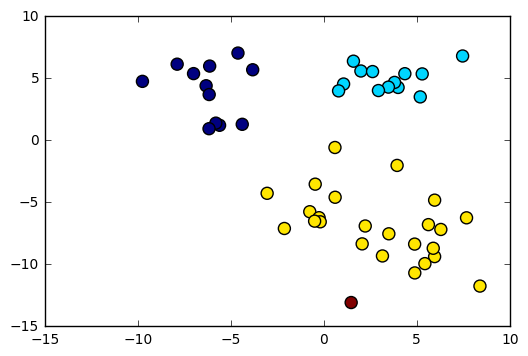

In [19]:
plt.scatter(X[:,0], X[:,1], c=Y_hat, s=75);

### Complete Link

In [20]:
import scipy
Z = scipy.cluster.hierarchy.linkage(X, method='complete', metric='euclidean')

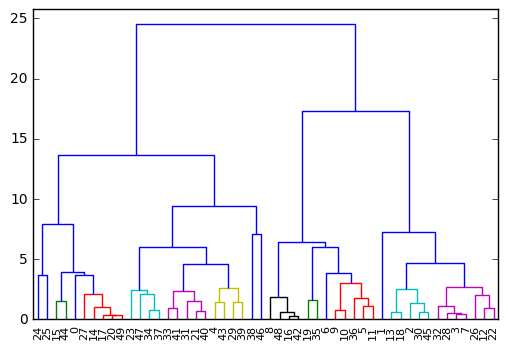

In [21]:
d = scipy.cluster.hierarchy.dendrogram(Z, color_threshold=3)

In [22]:
Y_hat = scipy.cluster.hierarchy.fcluster(Z, t=4, criterion='maxclust')

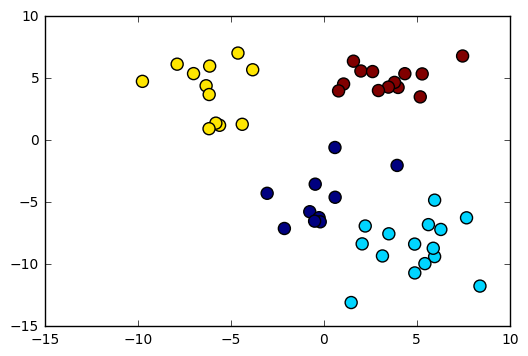

In [23]:
plt.scatter(X[:,0], X[:,1], c=Y_hat, s=75);

### Average link

In [24]:
Z = scipy.cluster.hierarchy.linkage(X, method='average', metric='euclidean')

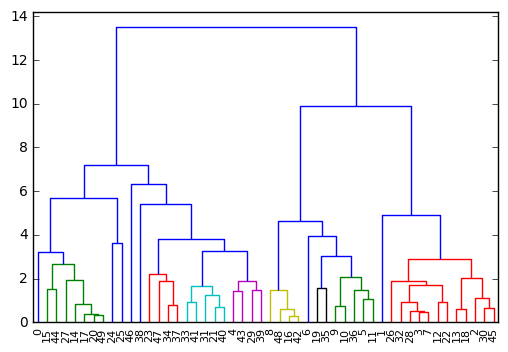

In [25]:
d = scipy.cluster.hierarchy.dendrogram(Z, color_threshold=3)

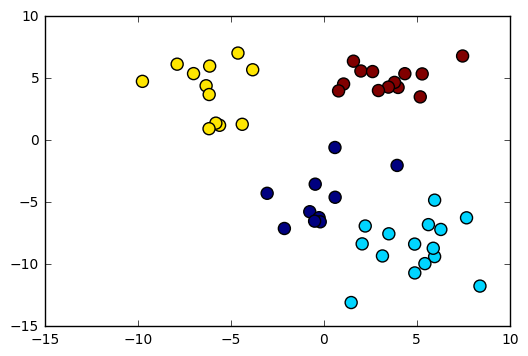

In [26]:
Y_hat = scipy.cluster.hierarchy.fcluster(Z, t=4, criterion='maxclust')
plt.scatter(X[:,0], X[:,1], c=Y_hat, s=75);

### Ward link

In [27]:
Z = scipy.cluster.hierarchy.linkage(X, method='ward', metric='euclidean')

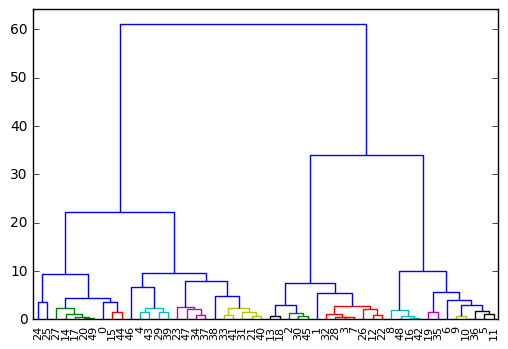

In [28]:
d = scipy.cluster.hierarchy.dendrogram(Z, color_threshold=3)

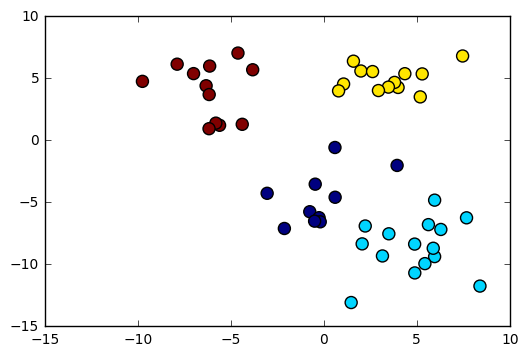

In [29]:
Y_hat = scipy.cluster.hierarchy.fcluster(Z, t=4, criterion='maxclust')
plt.scatter(X[:,0], X[:,1], c=Y_hat, s=75);